# Assignment 1
Monday March 4th, 2019 at 23:5

In [26]:
# Imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

### Helping methods used thoughout the assignment

In [19]:
# Returns a subset of the data depending on given dates at cateories (type of crime)
def getSubSet(dates, crimes, data):
    subset = []
    for date in dates:
        subset.append(data.loc[data['Date'].str.contains(date)])
    subset = pd.concat(subset)
    result = []
    for crime in crimes:
        result.append(subset.loc[subset['Category'].str.contains(crime)])
    return pd.concat(result)

In [40]:
# Adds a histogram to a figure 
def createHistogram(group,crimeName,axs, i):
    ax = axs[math.floor(i/2)][(i%2)]
    group['Category'].count().plot(kind='bar', ax=ax)
    years = group['Year'].unique().keys()
    
    ax.set_xticks(range(len(years)))
    if i>11:
        ax.set_xticklabels(years)
    else:
        ax.set_xticklabels([])
        ax.set_xlabel('')
    ax.set_title('Yearly development given the crime %s' % crimeName)

## Part 1: Temporal evolution of focus crimes

Police chief Suneman is interested in the temporal development of only a subset of categories, the so-called focus crimes.

In [17]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 
                   'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 
                   'BURGLARY', 'ASSAULT', 
                   'DRUNKENNESS', 'DRUG/NARCOTIC', 
                   'TRESPASS', 'LARCENY/THEFT', 
                   'VANDALISM', 'VEHICLE THEFT', 
                   'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

Underneath are some bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017.

In [18]:
# Import data
data = pd.read_csv("../Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv") 
print("The overall amount of crimes in the dataset are %d" % len(data))

The overall amount of crimes in the dataset are 2215024


In [39]:
# Filter data to only include the focus crimes
focusData = getSubSet(["/"+str(i) for i in range(2003,2018)],
                      focuscrimes, data)

focusData['Year'] = focusData['Date'].str.split('/', expand=True)[2]

print("The overall amount of focuscrimes in the data are %d" % len(focusData))

The overall amount of focuscrimes in the data are 1251786


Underneath are some bar-charts displaying the year-by-year development of each of the focus categories across the years 2003-2017

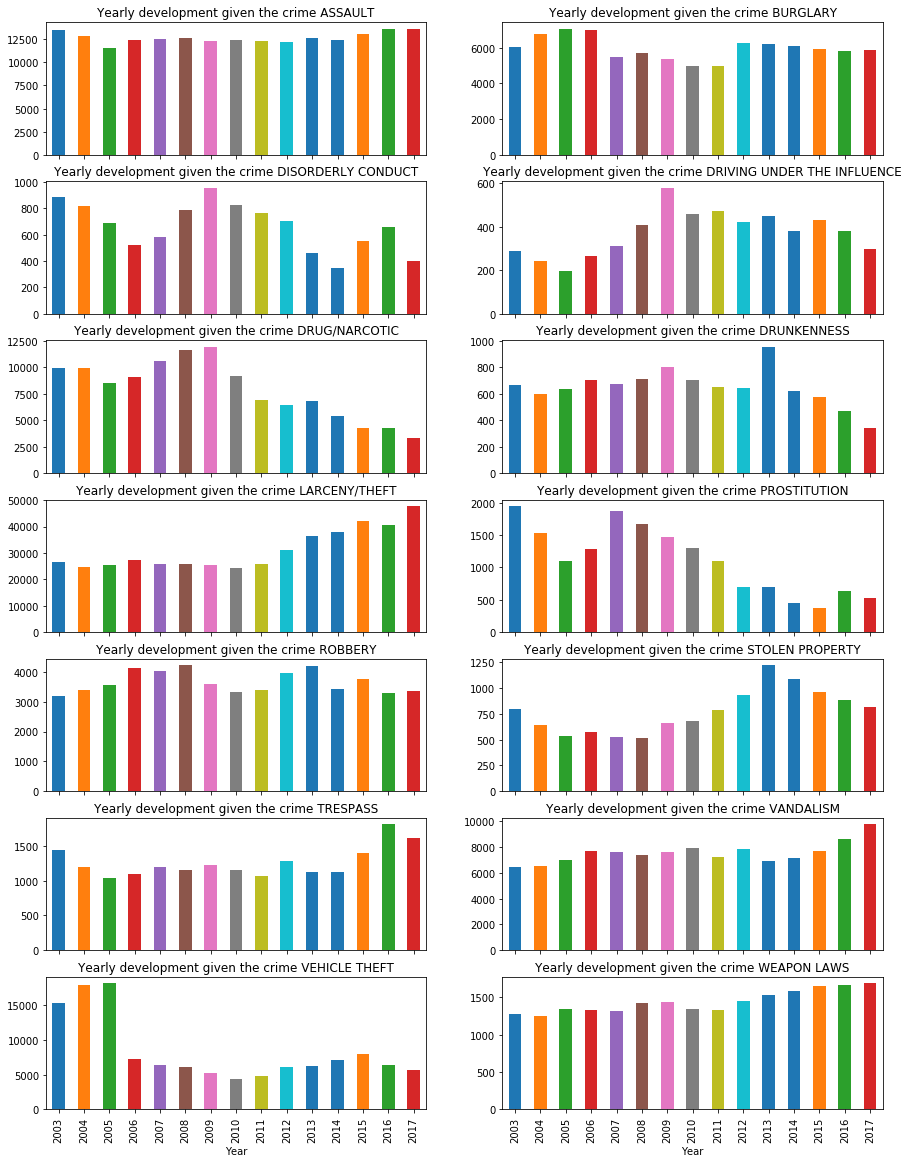

In [47]:
# Display bar-charts
fig, axs = plt.subplots(7, 2, figsize=(15, 20))

i = 0
for crime in sorted(focuscrimes):
    focusCrime = focusData.loc[focusData['Category'] == crime]
    focusCrime = focusCrime.groupby(['Year'])
    createHistogram(focusCrime,crime,axs, i)
    i+=1

plt.show()

## Part 2: Visualizing geo-data